# Analyse

In [3]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')
# sns.set_style("whitegrid", {'axes.grid' : True})

In [4]:
#Since the data has already been prepared the quick'n'easy way is by loading it directly from our GitHub:
easypath = "https://raw.githubusercontent.com/Naeim-S/GRP33/master/EXAM/merged_ratio.csv"
merged = pd.read_csv(easypath, index_col=0)
merged.tail()
#If you want to see and go through the entire process of:
#taking the scraped data, merging it with data from Statistics Denmark and then creating all the ratio variables
#The below code is your way to go :)
#Have fun and enjoy some beautiful data!

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


In [3]:
#The scraped data with the first differences is loaded
path = "https://github.com/Naeim-S/GRP33/blob/master/EXAM/Multi_JobIndexed.xlsx?raw=true"
jobindexed = pd.read_excel(path)
#Multi indexing will be done after merging:
# jobindexed = jobindexed.set_index(['year', 'area', 'sektor', 'jobtype']).sort_index()
jobindexed.tail(10)

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,FD_jobtype_area,FD_sektor_area,FD_sektor,FD_area,FD_year,RFD_jobtype_area,RFD_sektor_area,RFD_sektor,RFD_area,RFD_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,292.0,-10.0,1349.0,-368.0,-5600.0,0.136512,-0.001577,0.030421,-0.013971,-0.020584
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,21.0,-10.0,1349.0,-368.0,-5600.0,0.119318,-0.001577,0.030421,-0.013971,-0.020584
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,52.0,-10.0,1349.0,-368.0,-5600.0,0.119540,-0.001577,0.030421,-0.013971,-0.020584
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,21.0,-10.0,1349.0,-368.0,-5600.0,0.099526,-0.001577,0.030421,-0.013971,-0.020584
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,12.0,-10.0,1349.0,-368.0,-5600.0,0.184615,-0.001577,0.030421,-0.013971,-0.020584
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-3.0,-10.0,1349.0,-368.0,-5600.0,-0.008264,-0.001577,0.030421,-0.013971,-0.020584
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,17.0,231.0,985.0,-368.0,-5600.0,0.739130,0.054124,0.023346,-0.013971,-0.020584
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,131.0,231.0,985.0,-368.0,-5600.0,0.282937,0.054124,0.023346,-0.013971,-0.020584
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-156.0,231.0,985.0,-368.0,-5600.0,-0.095647,0.054124,0.023346,-0.013971,-0.020584
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,236.0,231.0,985.0,-368.0,-5600.0,0.120347,0.054124,0.023346,-0.013971,-0.020584


In [ ]:
#Converting the danish words to english:


In [4]:
#Load the BNP data from DST:
import requests

def get_data(table_id,variables):
    base = 'https://api.statbank.dk/v1/data/{id}/JSONSTAT?lang=en'.format(id = table_id)
    
    for var in variables:
        base += '&{v}'.format(v = var) 

    response=requests.get(base)
    data_json=response.json()
    return data_json

indexlabels_bnp=[2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
data_bnp=get_data('NAN1',['Tid=2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017','TRANSAKT=B1GQK','PRISENHED=LAN_M']) # Nordjylland
BNP=pd.DataFrame(data_bnp['dataset']['value'],index=indexlabels_bnp,columns=['BNP, 1000 kr. (2010)'])
# BNP=BNP.reindex(labels = ['year'], index=BNP.index[::-1]).sort_index()
# BNP=BNP.transpose()
BNP.index.names = ['year']
BNP["FD_BNP"] = BNP.diff(1)
BNP["RFD_BNP"] = BNP["BNP, 1000 kr. (2010)"].pct_change(1)
BNP

,"BNP, 1000 kr. (2010)",FD_BNP,RFD_BNP
year,,,
2007,1879.008892,NaN,NaN
2008,1869.388052,-9.620840,-0.005120
2009,1777.665635,-91.722417,-0.049065
2010,1810.925601,33.259966,0.018710
2011,1835.133652,24.208051,0.013368
2012,1839.290226,4.156574,0.002265
2013,1856.457075,17.166849,0.009333
2014,1886.520426,30.063351,0.016194
2015,1916.828880,30.308454,0.016066


In [5]:
#Merge the JobIndex data with the BNP:
merged = pd.merge(jobindexed, BNP, on="year", how="left", validate="m:1")
#Create the multi index:
# merged = merged.set_index(['year', 'area', 'sektor', 'jobtype']).sort_index()
merged.tail(10) #Looks beautiful

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,FD_area,FD_year,RFD_jobtype_area,RFD_sektor_area,RFD_sektor,RFD_area,RFD_year,"BNP, 1000 kr. (2010)",FD_BNP,RFD_BNP
1340,2009,region-sjaelland,social,pleje,1285,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.426851,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1341,2009,region-sjaelland,social,psykologi,150,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.380165,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1342,2009,region-sjaelland,social,socialraadgivning,423,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.136735,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1343,2009,region-sjaelland,social,tandlaege,89,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.513661,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1344,2009,region-sjaelland,social,teknisksundhed,80,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.304348,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1345,2009,region-sjaelland,social,terapi,252,4492,32775,16937,167084,473460,...,-16018.0,-145823.0,-0.360406,-0.385331,-0.310029,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1346,2009,region-sjaelland,undervisning,bibliotek,41,3621,31884,16937,167084,473460,...,-16018.0,-145823.0,-0.145833,-0.384288,-0.309272,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1347,2009,region-sjaelland,undervisning,forskning,269,3621,31884,16937,167084,473460,...,-16018.0,-145823.0,-0.258953,-0.384288,-0.309272,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1348,2009,region-sjaelland,undervisning,laerer,895,3621,31884,16937,167084,473460,...,-16018.0,-145823.0,-0.425546,-0.384288,-0.309272,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065
1349,2009,region-sjaelland,undervisning,paedagog,2074,3621,31884,16937,167084,473460,...,-16018.0,-145823.0,-0.407598,-0.384288,-0.309272,-0.486057,-0.466027,1777.665635,-91.722417,-0.049065


In [6]:
#Creating the absolute ratio variables:
merged["AR_jobtype_area"] = merged["FD_jobtype_area"] / merged["FD_BNP"]
merged["AR_sektor_area"] = merged["FD_sektor_area"] / merged["FD_BNP"]
merged["AR_sektor"] = merged["FD_sektor"] / merged["FD_BNP"]
merged["AR_area"] = merged["FD_area"] / merged["FD_BNP"]
merged["AR_year"] = merged["FD_year"] / merged["FD_BNP"]

#Creating the relative ratio variables:
merged["RR_jobtype_area"] = merged["RFD_jobtype_area"] / merged["RFD_BNP"]
merged["RR_sektor_area"] = merged["RFD_sektor_area"] / merged["RFD_BNP"]
merged["RR_sektor"] = merged["RFD_sektor"] / merged["RFD_BNP"]
merged["RR_area"] = merged["RFD_area"] / merged["RFD_BNP"]
merged["RR_year"] = merged["RFD_year"] / merged["RFD_BNP"]

merged.to_csv("merged_ratio.csv") #Saved as a back up, just in case.
merged.to_excel("merged_ratio.xlsx") #Saved as a back up, just in case.
merged.tail(10) #What a lovely sight

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


In [7]:
merged.tail(10) #What a lovely sight

,year,area,sektor,jobtype,n_jobtype_area,n_sektor_area,n_sektor,n_area,n_year,20-64years_area,...,AR_jobtype_area,AR_sektor_area,AR_sektor,AR_area,AR_year,RR_jobtype_area,RR_sektor_area,RR_sektor,RR_area,RR_year
4940,2017,region-sjaelland,social,pleje,2431,6330,45693,25973,266462,462645,...,6.561939,-0.224724,30.315259,-8.269841,-125.845406,5.995866,-0.069277,1.336155,-0.613614,-0.904066
4941,2017,region-sjaelland,social,psykologi,197,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,5.240666,-0.069277,1.336155,-0.613614,-0.904066
4942,2017,region-sjaelland,social,socialraadgivning,487,6330,45693,25973,266462,462645,...,1.168564,-0.224724,30.315259,-8.269841,-125.845406,5.250419,-0.069277,1.336155,-0.613614,-0.904066
4943,2017,region-sjaelland,social,tandlaege,232,6330,45693,25973,266462,462645,...,0.471920,-0.224724,30.315259,-8.269841,-125.845406,4.371361,-0.069277,1.336155,-0.613614,-0.904066
4944,2017,region-sjaelland,social,teknisksundhed,77,6330,45693,25973,266462,462645,...,0.269669,-0.224724,30.315259,-8.269841,-125.845406,8.108635,-0.069277,1.336155,-0.613614,-0.904066
4945,2017,region-sjaelland,social,terapi,360,6330,45693,25973,266462,462645,...,-0.067417,-0.224724,30.315259,-8.269841,-125.845406,-0.362990,-0.069277,1.336155,-0.613614,-0.904066
4946,2017,region-sjaelland,undervisning,bibliotek,40,4499,43176,25973,266462,462645,...,0.382031,5.191123,22.135308,-8.269841,-125.845406,32.463918,2.377209,1.025407,-0.613614,-0.904066
4947,2017,region-sjaelland,undervisning,forskning,594,4499,43176,25973,266462,462645,...,2.943884,5.191123,22.135308,-8.269841,-125.845406,12.427110,2.377209,1.025407,-0.613614,-0.904066
4948,2017,region-sjaelland,undervisning,laerer,1475,4499,43176,25973,266462,462645,...,-3.505693,5.191123,22.135308,-8.269841,-125.845406,-4.200979,2.377209,1.025407,-0.613614,-0.904066
4949,2017,region-sjaelland,undervisning,paedagog,2197,4499,43176,25973,266462,462645,...,5.303485,5.191123,22.135308,-8.269841,-125.845406,5.285843,2.377209,1.025407,-0.613614,-0.904066


Plotting for all years:

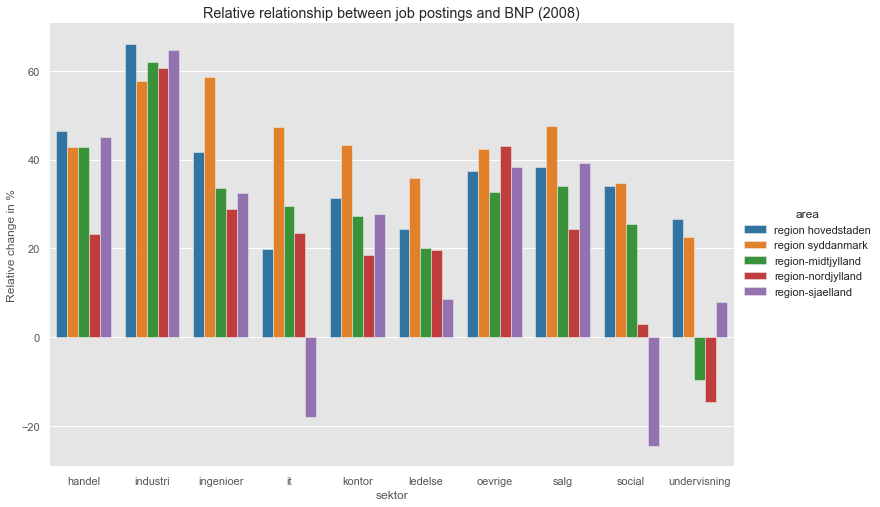

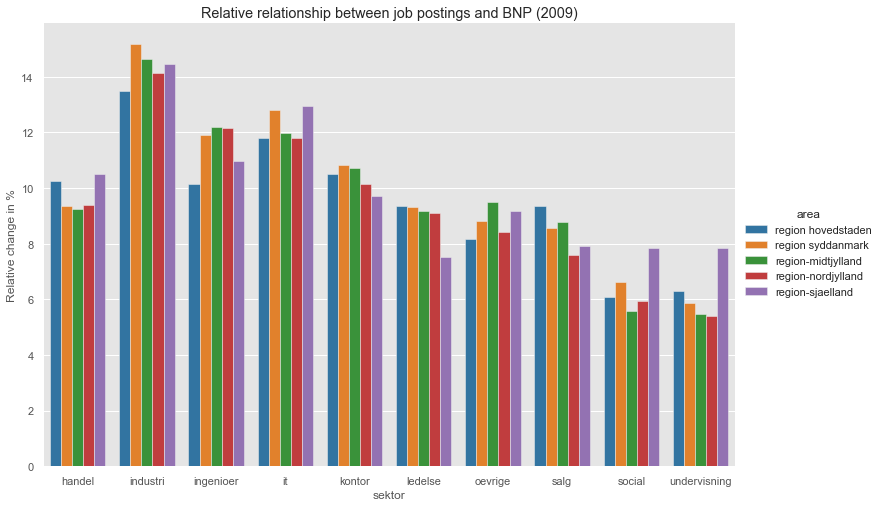

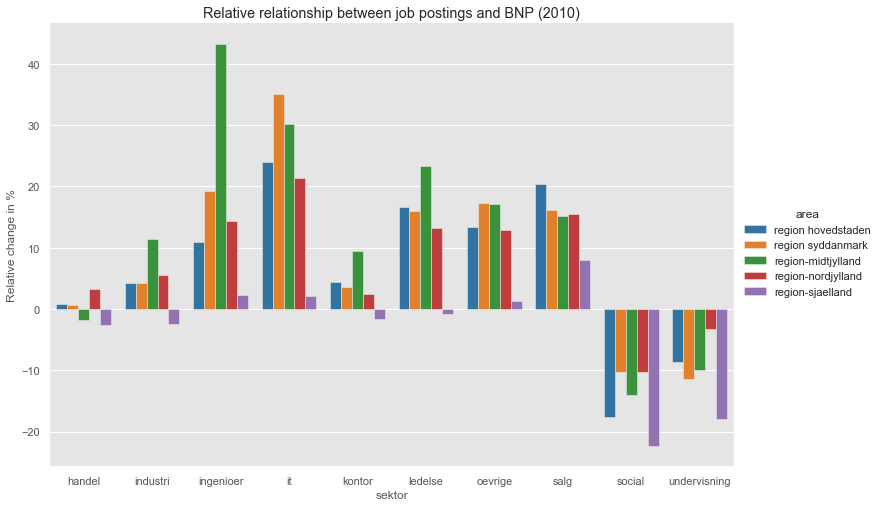

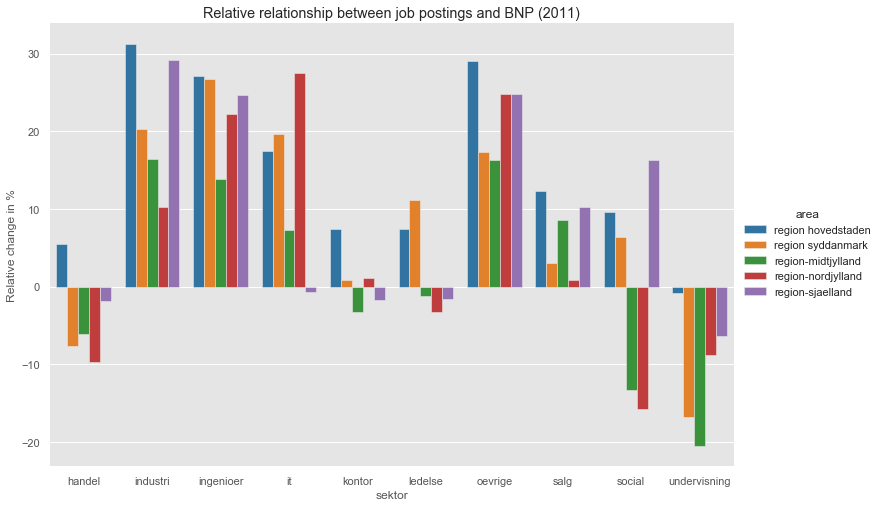

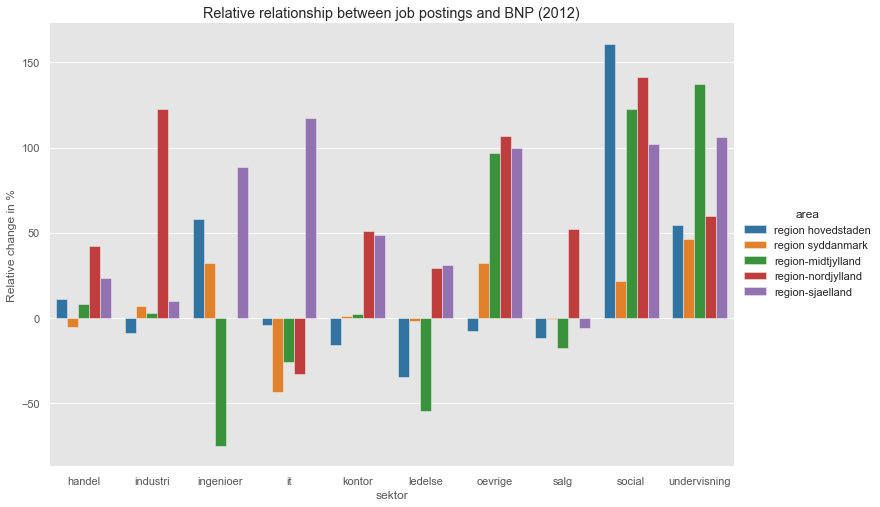

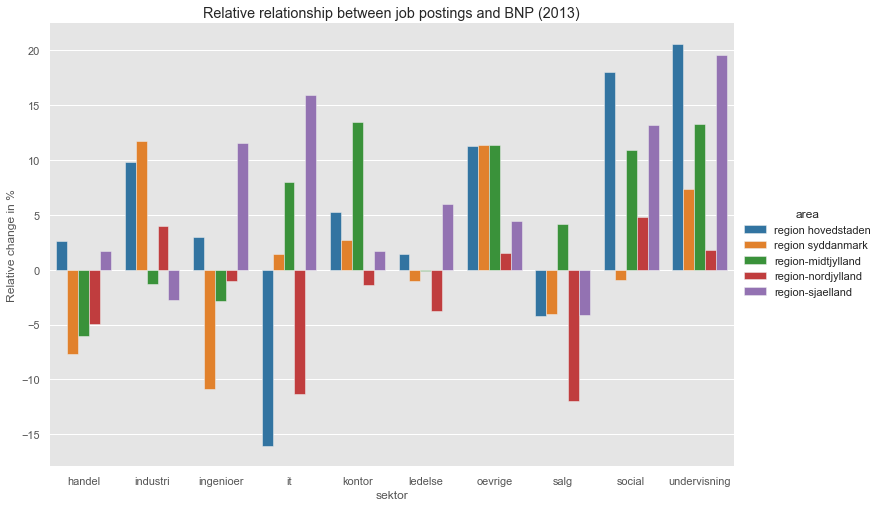

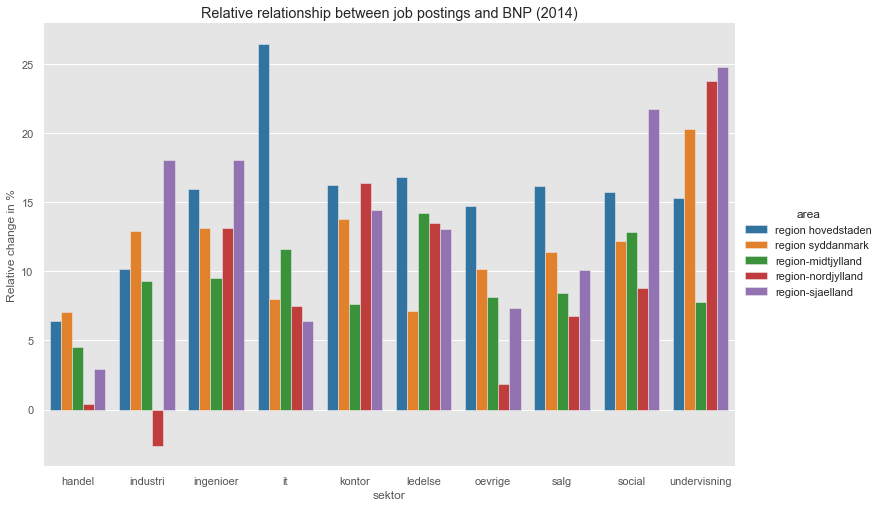

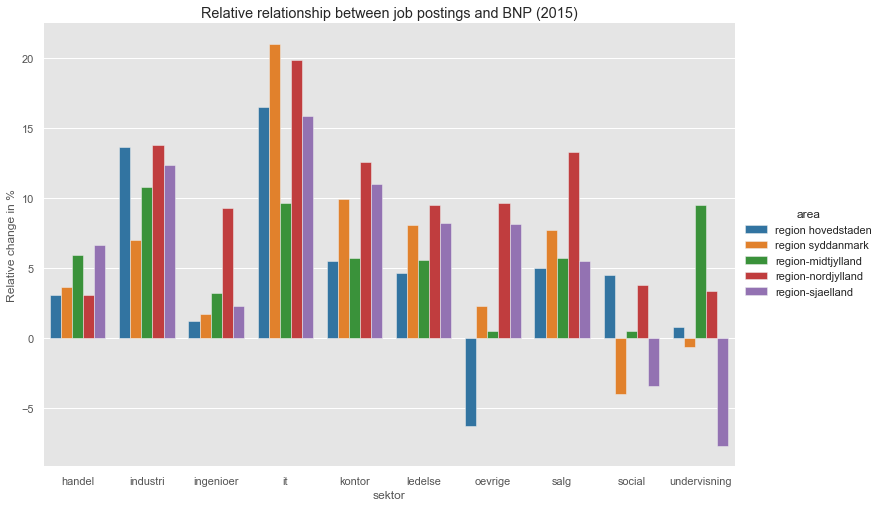

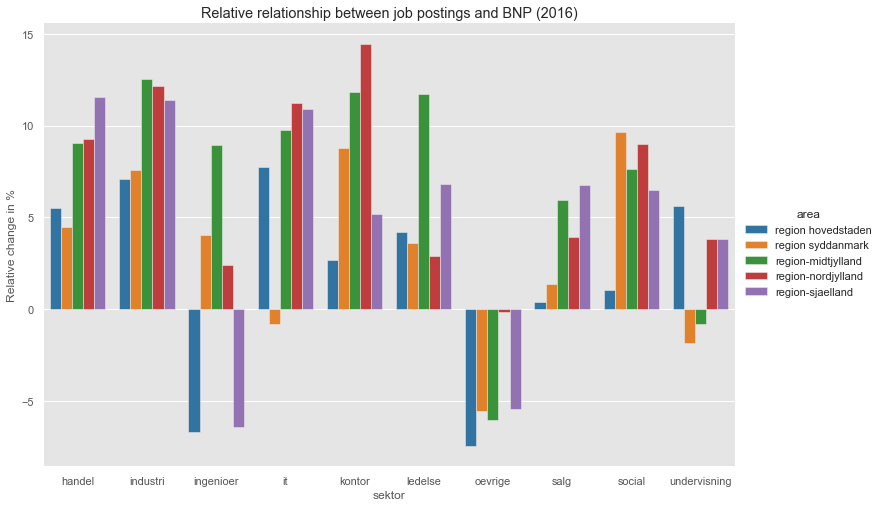

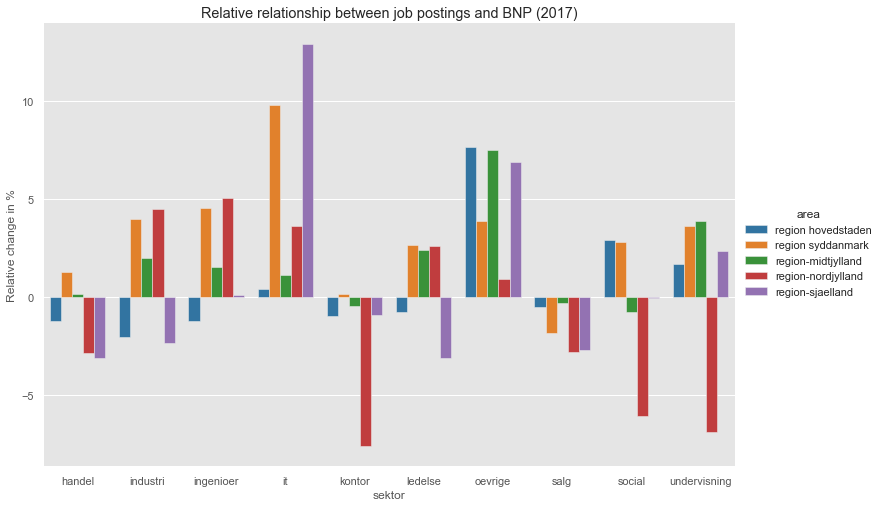

In [9]:
sns.set_palette("tab10")
for x in range(2008,2018,1):
    sns.catplot(x='sektor', y="RR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged.query("year ==" + str(x)))
    plt.title("Relative relationship between job postings and BNP (" + str(x) + ")")
    plt.ylabel("Relative change in %")    

Selecting interesting years:

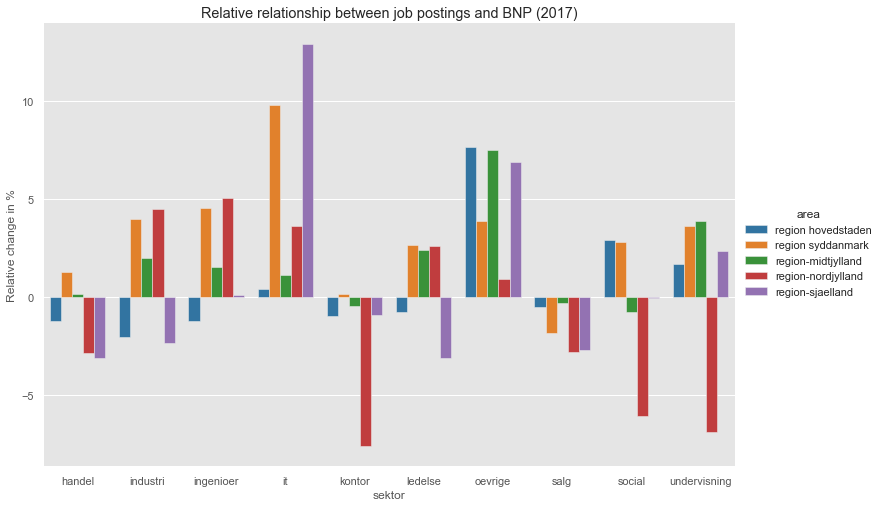

In [25]:
merged2017 = merged.query('year == 2017')
sns.set_palette("tab10")
sns.catplot(x='sektor', y="RR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged2017)
plt.title("Relative relationship between job postings and BNP (2017)")
plt.ylabel("Relative change in %")
plt.savefig("Sektor_area_2017.png")
#when BNP increased by 1% from 2016 to 2017 the amount of job postings 
#in the region of northern jutland within the sector of engineering and technology increased by 5%.

Text(30.3229,0.5,'Relative change in %')

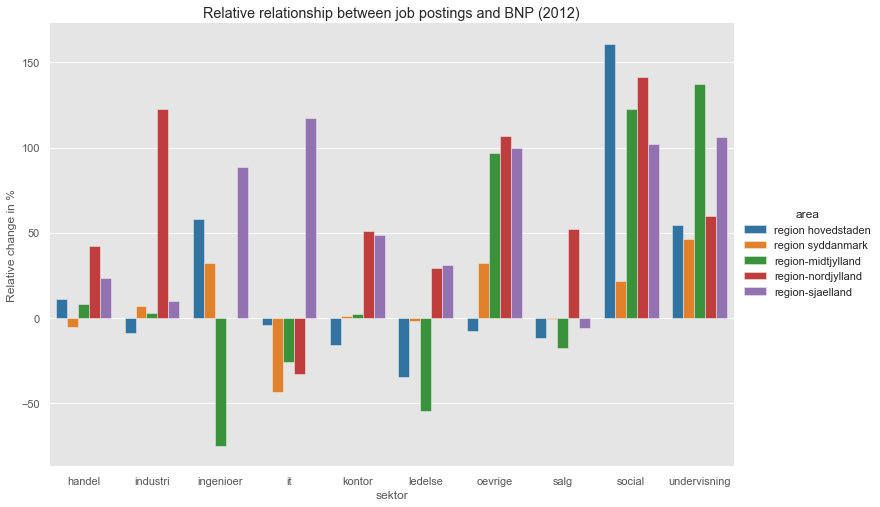

In [27]:
merged2012 = merged.query('year == 2012')
sns.set_palette("tab10")
sns.catplot(x='sektor', y="RR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged2012)
plt.title("Relative relationship between job postings and BNP (2012)")
plt.ylabel("Relative change in %")
# plt.savefig("Sektor_area_2009.png")

Text(30.3003,0.5,'Absolute change in job postings')

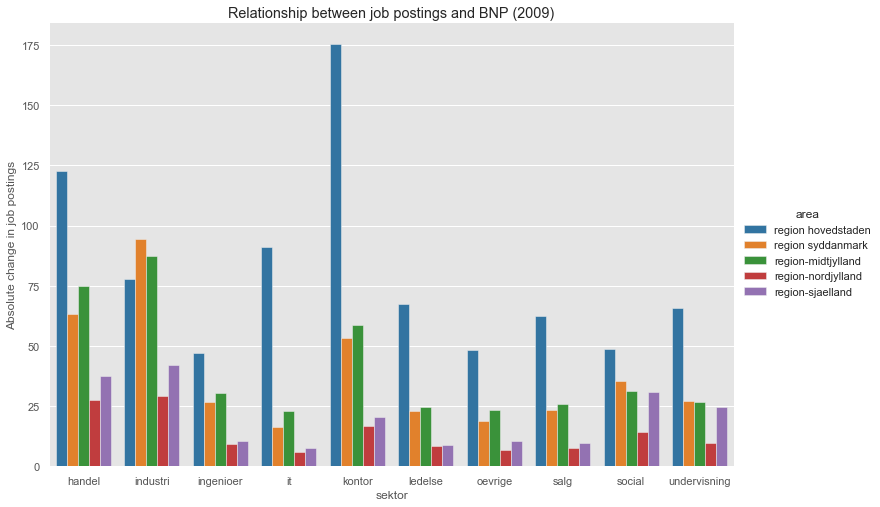

In [33]:
merged2009 = merged.query('year == 2009')
sns.set_palette("tab10")
sns.catplot(x='sektor', y="AR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged2009)
plt.title("Relationship between job postings and BNP (2009)")
plt.ylabel("Absolute change in job postings")
# plt.savefig("Sektor_area_2009.png")

Text(29.2182,0.5,'Relative change in %')

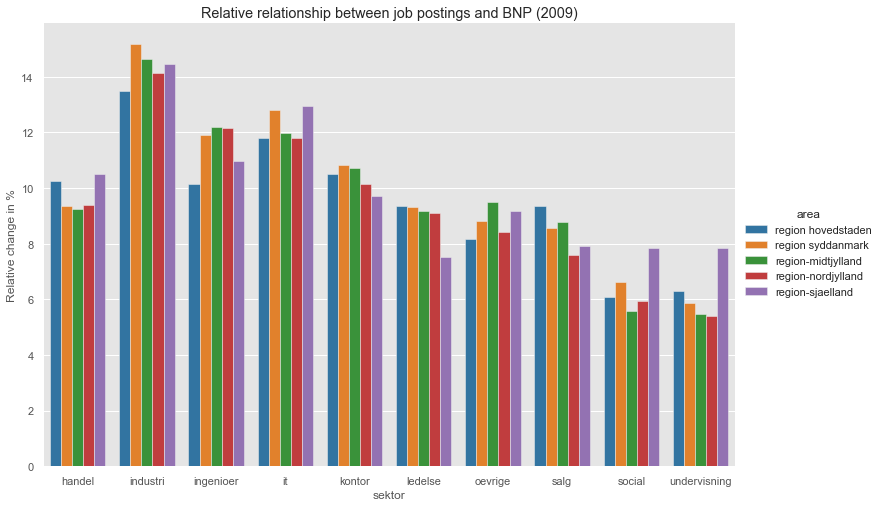

In [34]:
merged2009 = merged.query('year == 2009')
sns.set_palette("tab10")
sns.catplot(x='sektor', y="RR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged2009)
plt.title("Relative relationship between job postings and BNP (2009)")
plt.ylabel("Relative change in %")
plt.savefig("Sektor_area_2009.png")

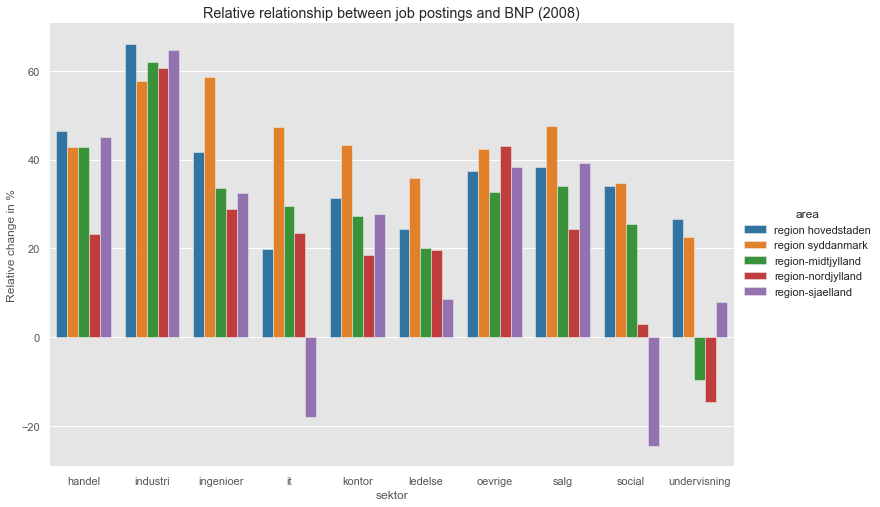

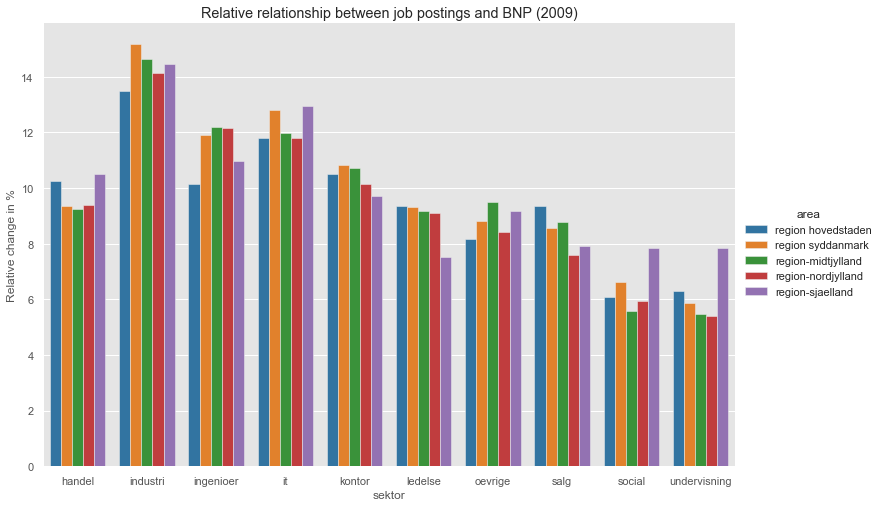

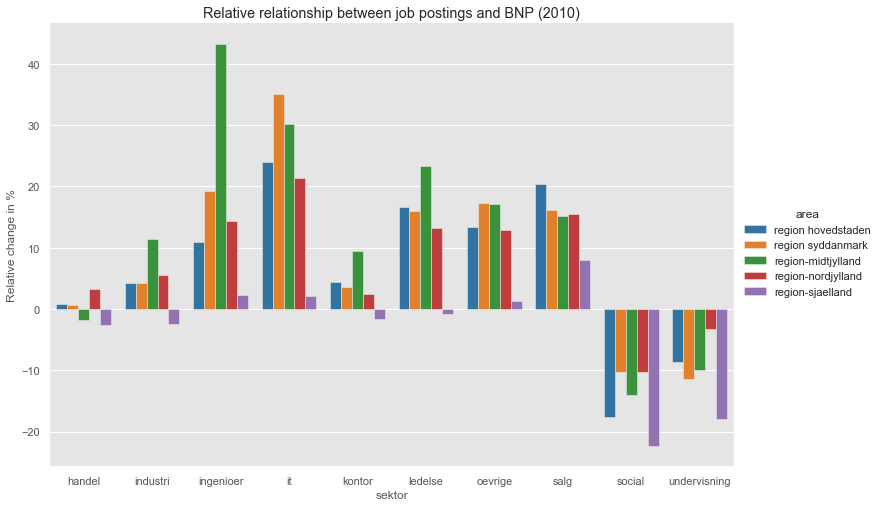

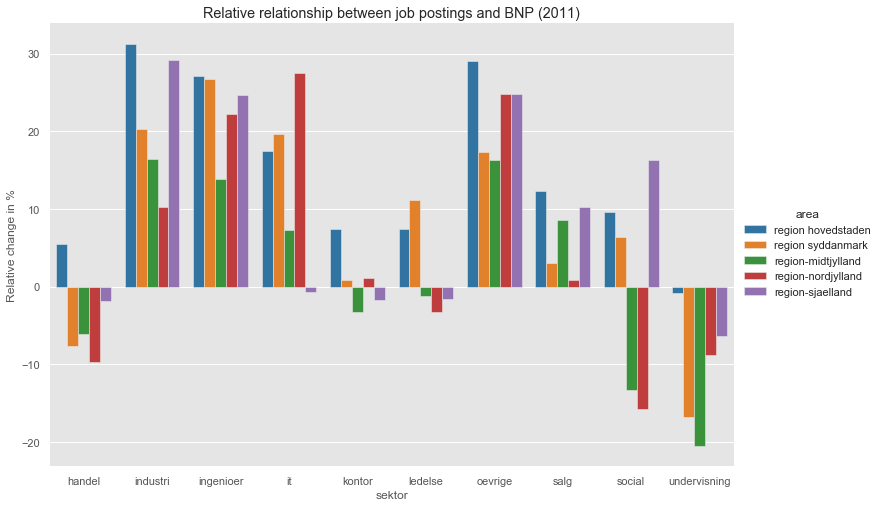

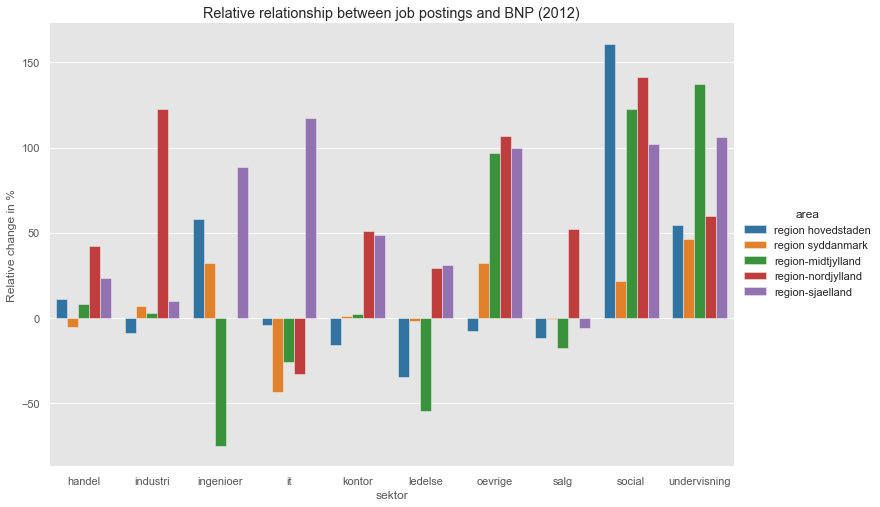

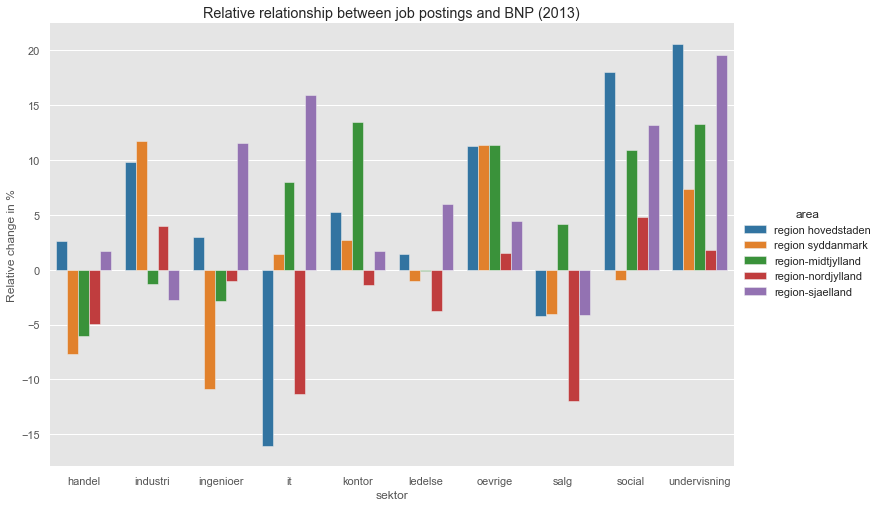

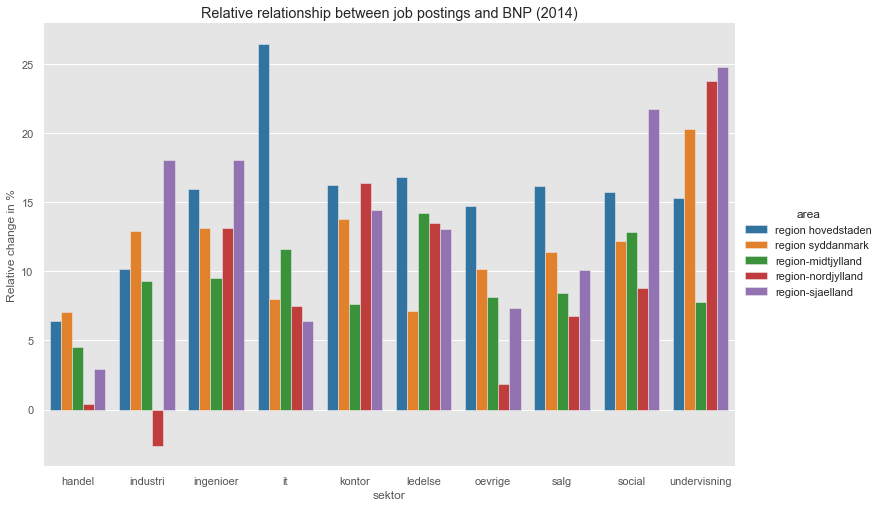

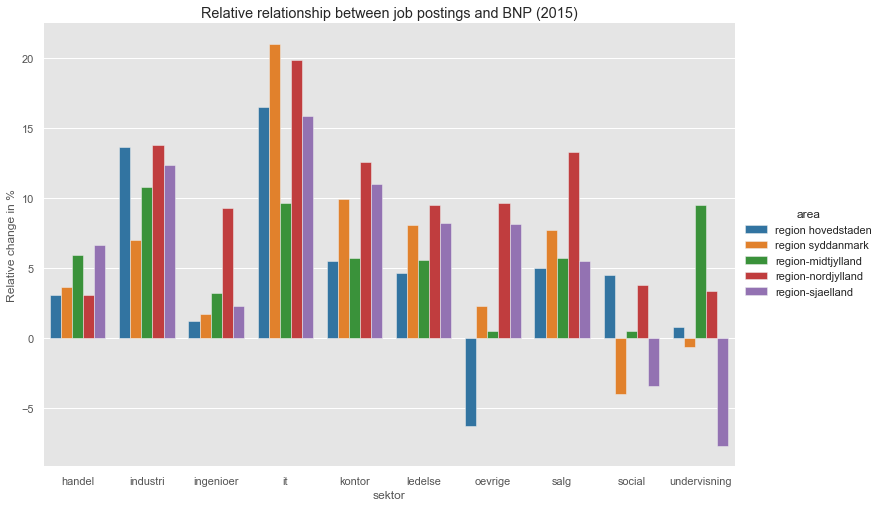

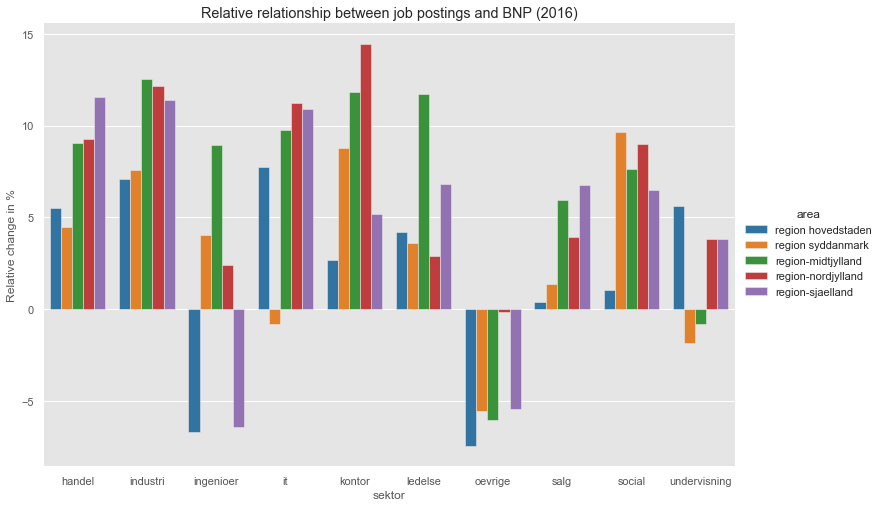

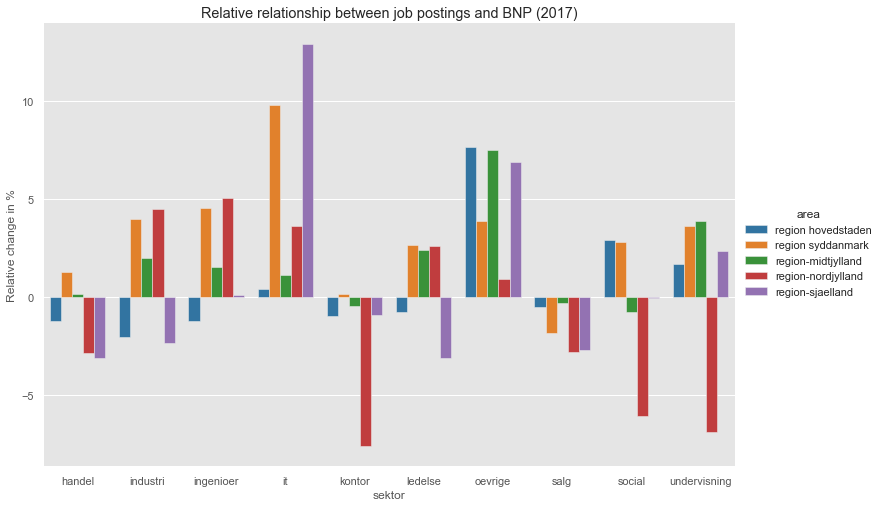

In [38]:
for x in range(2008,2018,1):
    sns.catplot(x='sektor', y="RR_sektor_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged.query("year ==" + str(x)))
    plt.title("Relative relationship between job postings and BNP (" + str(x) + ")")
    plt.ylabel("Relative change in %")    

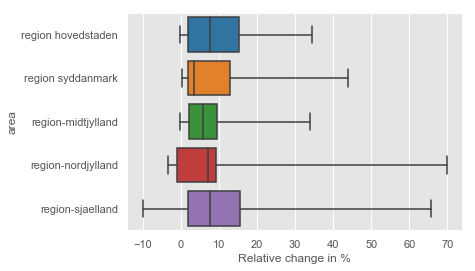

In [5]:
ax = sns.boxplot(x="RR_area", y="area", data=merged,
                 whis=np.inf, palette="tab10")
plt.xlabel("Relative change in %")
plt.savefig("Boxplot_area.png",dpi=300, bbox_inches = "tight")

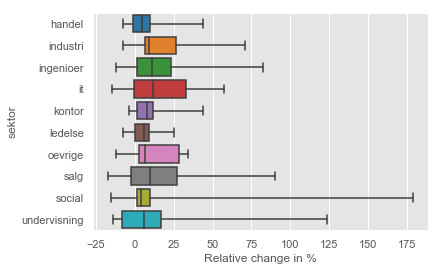

In [9]:
ax = sns.boxplot(x="RR_sektor", y="sektor", data=merged,
                 whis=np.inf, palette="tab10")
plt.xlabel("Relative change in %")
plt.savefig("Boxplot_sector.png",dpi=300, bbox_inches = "tight")

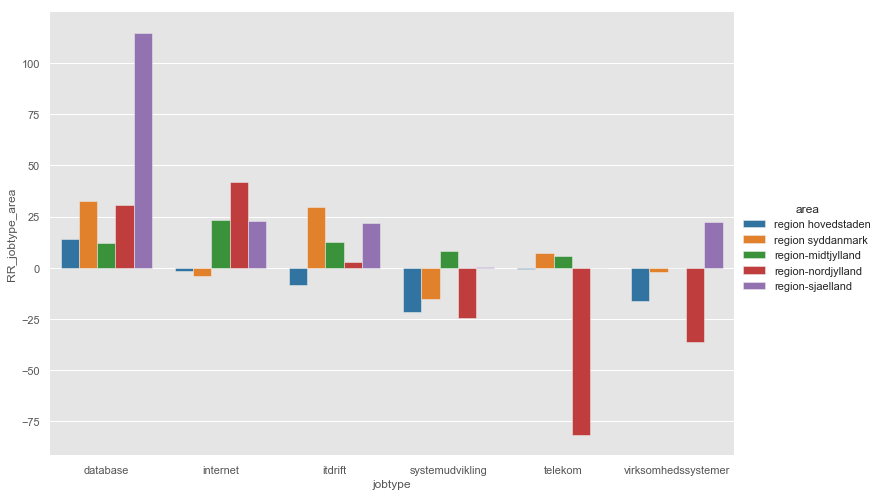

In [29]:
sns.catplot(x='jobtype', y="RR_jobtype_area", 
            kind="bar", 
            hue="area",
            height = 7,
            aspect= 1.5,
            data=merged.query('sektor == "it" & jobtype != "itkurser" & year == 2013'))

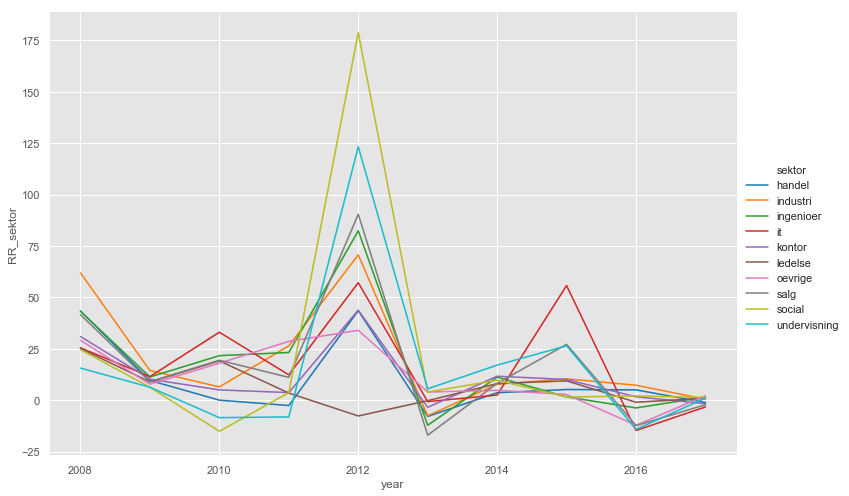

In [21]:
sns.relplot(x='year', y="RR_sektor", 
            kind="line", 
            hue="sektor",
            height = 7,
            aspect= 1.5,
            data=merged)